### Import Libraries

In [2]:
import os

from PIL import Image
import cv2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')

### Fetch Dataset

In [8]:
from urllib import request

if 'datasets' not in os.listdir():
    folder_name = 'datasets'
    os.mkdir(path=f'./{folder_name}')

sources={
    'dataset_11.zip':'https://figshare.com/ndownloader/articles/7472168/versions/1',
    'dataset_12.rar':'https://figshare.com/ndownloader/files/35127724',
    'dataset_13.tar':'https://figshare.com/ndownloader/files/28399209'
}
  
for dataset in sources:
    path=request.urlretrieve(sources[dataset],f'./datasets/{dataset}')
    print(f'{dataset}:{sources[dataset]}')

dataset_11.zip:https://figshare.com/ndownloader/articles/7472168/versions/1
dataset_12.rar:https://figshare.com/ndownloader/files/35127724
dataset_13.tar:https://figshare.com/ndownloader/files/28399209


### Unzip it with before processing

### Preprocessing:

#### Individual :

 >- Dataset 11: Crop Image
 >- Dataset 12: Remove White texts
 >- Dataset 13: nothing

#### All:

>- Resize to 250x250
>- label 
>- save as jpg format


#### Dataset 11: Crop images 

In [101]:
borders=(500,300,2000,1800)
img = Image.open('./datasets/dataset_11/001 SF.png')
crop_img = img.crop(borders)

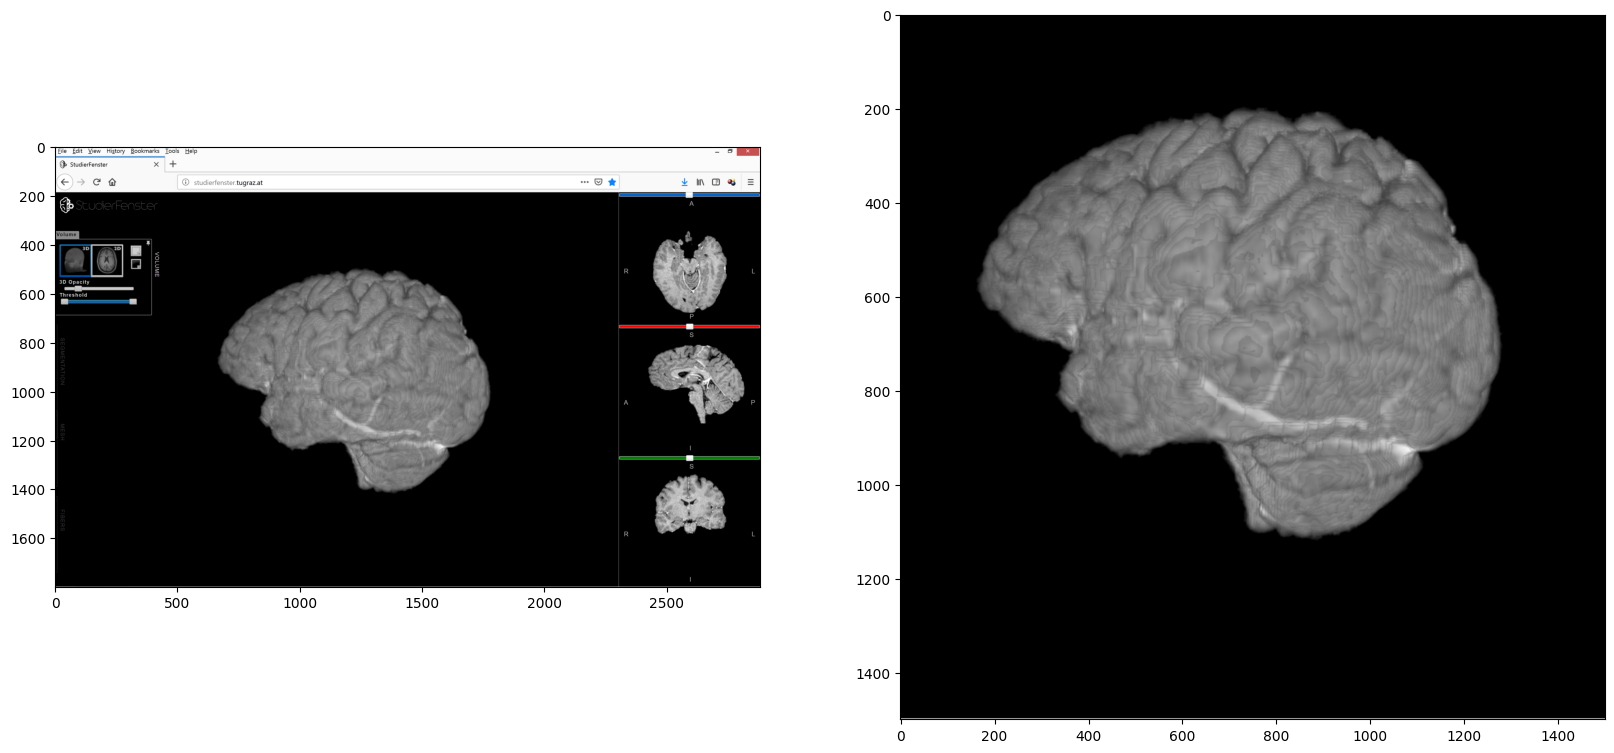

In [102]:
fig, axes = plt.subplots(1,2,figsize = (20,20))

axes[0].imshow(img)
axes[1].imshow(crop_img)

plt.show()

In [166]:
#  (left, upper, right, lower)
borders=(500,300,2000,1800)

for file in os.listdir(path='./datasets/dataset_11/Skull-stripped Contrast-Enhanced MRI Datasets'):
    if '.png' in file:
        img = Image.open(f'./datasets/dataset_11/Skull-stripped Contrast-Enhanced MRI Datasets/{file}')
        img = img.crop(borders)
        img.save(f'./datasets/dataset_11/Skull-stripped Contrast-Enhanced MRI Datasets/{file}')

#### Dataset 12: Remove White texts

In [69]:
img = cv2.imread('./datasets/Brain_tumor_dataset/Gliomas/110.bmp')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_img, 254, 255, cv2.THRESH_BINARY)
masked = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)

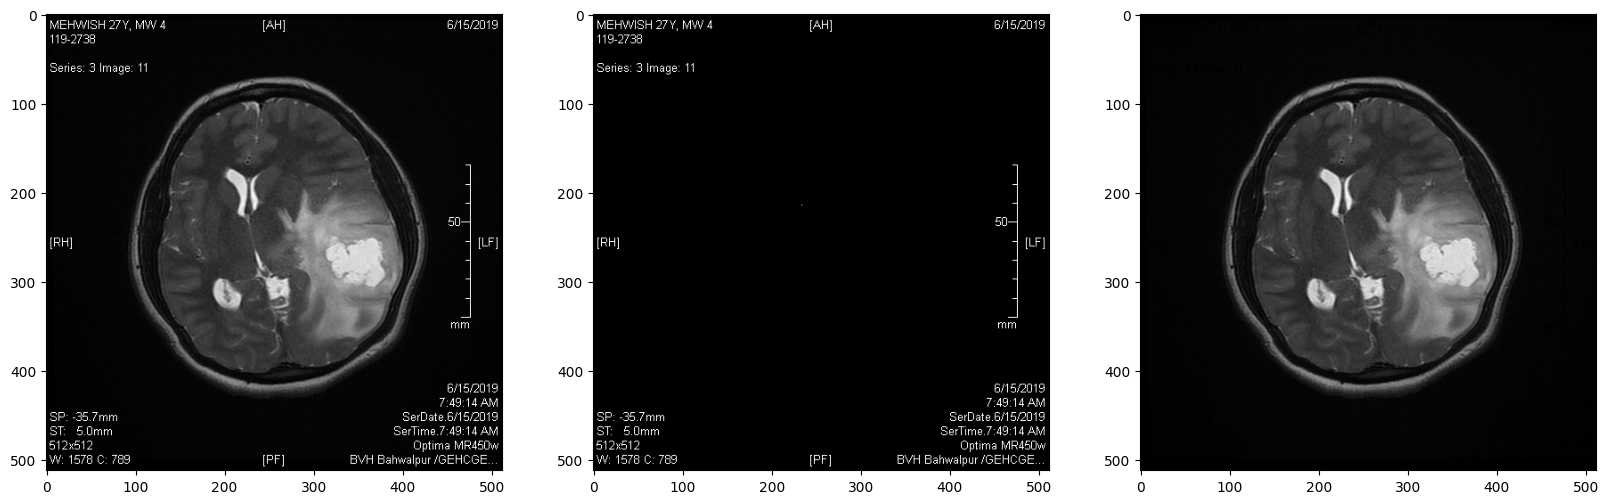

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (20,20))

axes[0].imshow(img)
axes[1].imshow(mask, cmap='gray')
axes[2].imshow(masked)

plt.show()

In [88]:
def remove_text(img_path:str, destination:str)->None:
    img = cv2.imread(img_path,0)
    _, mask = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY)
    masked = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)
    cv2.imwrite(destination,masked)
    

In [97]:
cancers=['Gliomas','Meningiomas']


for folder in cancers:
    folder_path = f'./datasets/Brain_tumor_dataset/{folder}'
    for img in os.listdir(folder_path):
        if '.bmp' in img:
            img_path= f'{folder_path}/{img}'
            remove_text(img_path,img_path)

#### All:

>- Resize to 250x250
>- label 
>- save as jpg format

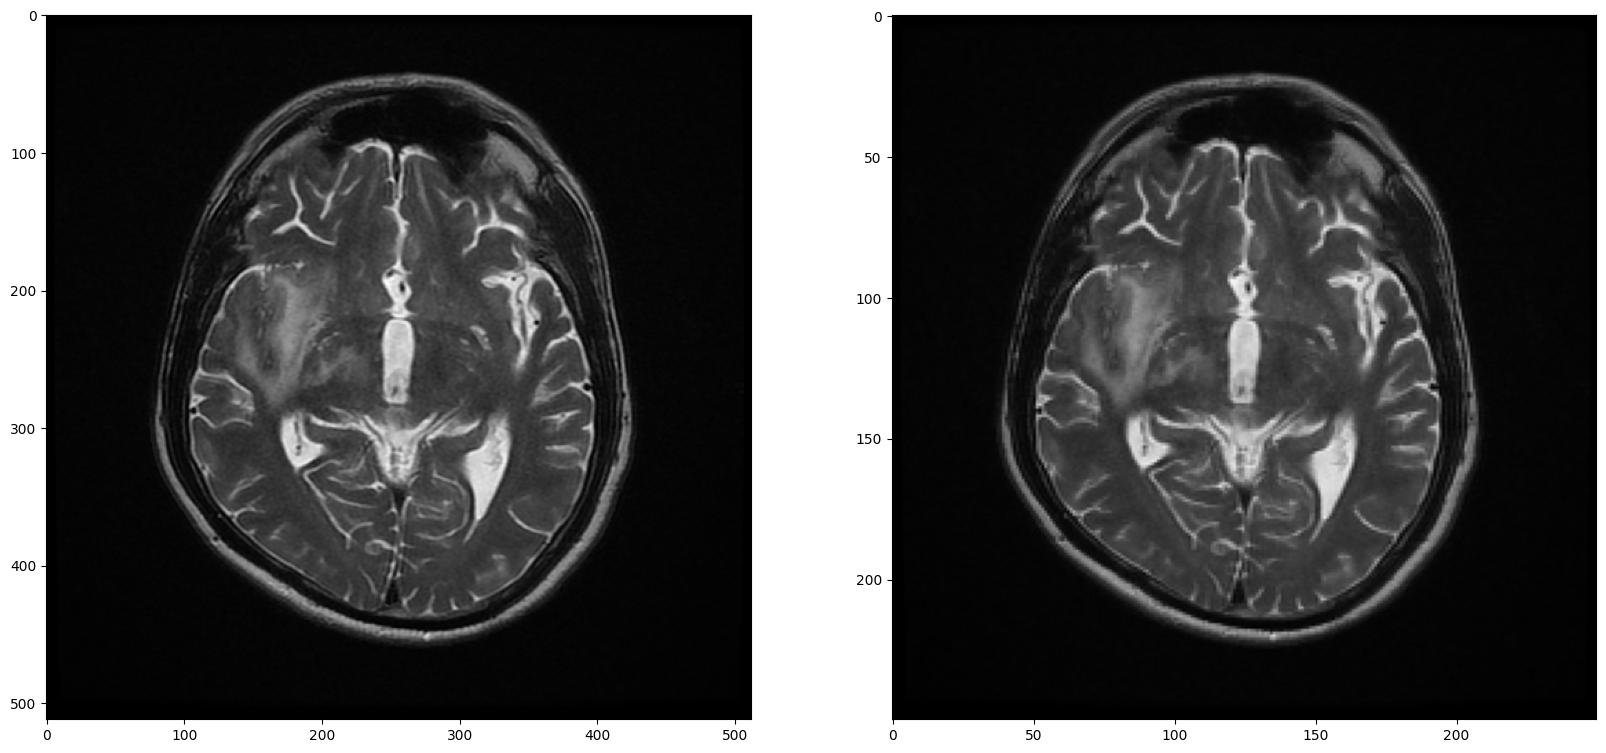

In [195]:
SIZE=(250,250)

img_path = './datasets/Brain_tumor_dataset/Meningiomas/1.bmp'
img = cv2.imread(img_path,1)
resize_img = cv2.resize(img,SIZE)

fig, axes = plt.subplots(1,2,figsize = (20,20))

axes[0].imshow(img)
axes[1].imshow(resize_img)

plt.show()


In [276]:
def resizeAndSave(source_dir:str,destination_dir:str,type:str,extensions:list)->None:
    dir_path=source_dir
    index= len(os.listdir(destination_dir))

    for file in os.listdir(dir_path):
        if any(ext in file for ext in extensions):
            index+=1
            destination=f'{destination_dir }/{type}_{index}.jpg'
            img_path=f'{dir_path}/{file}'
            size=(250,250)
            img = cv2.imread(img_path,1)
            resize_img = cv2.resize(img,size)
            cv2.imwrite(destination,resize_img)

In [278]:
# dataset 11

source='./datasets/dataset_11/Skull-stripped Contrast-Enhanced MRI Datasets/'
destionation='./clean_datasets/normal'

print(f'{destionation}, Expected size 10')
resizeAndSave(source,destionation,'normal',['png'])

./clean_datasets/normal, Expected size 10


In [ ]:
# Dataset 12 (129 excluding DS_store and link)
types=['Gliomas','Meningiomas']
dataset='./datasets/Brain_tumor_dataset'

for cancer in types:
    source=f'{dataset}/{cancer}'
    if os.path.isdir(source):
        cancer_type=cancer.lower().split('s')[0]
        destionation=f'./clean_datasets/{cancer_type}'
        print(f'{destionation}, Expected size {len(os.listdir(source))}')
        resizeAndSave(source,destionation,cancer_type,['bmp','jpg'])

./clean_datasets/glioma, Expected size 131
./clean_datasets/meningioma, Expected size 275


In [280]:
# Dataset 13

types=['Glioma','meningioma','Normal']
dataset='./datasets/dataset_13'

for cancer in types:
    source=f'{dataset}/{cancer}'
    if os.path.isdir(source):
        cancer_type=cancer.lower().split('s')[0]
        destionation=f'./clean_datasets/{cancer_type}'
        print(f'{destionation}, Expected size {len(os.listdir(source))}')
        resizeAndSave(source,destionation,cancer_type,['bmp','jpg'])

./clean_datasets/glioma, Expected size 76
./clean_datasets/meningioma, Expected size 76
./clean_datasets/normal, Expected size 1749


In [283]:
# Dataset 13

source='./datasets/dataset_13/small meningioma'
destionation='./clean_datasets/meningioma'

print(f'{destionation}, Expected size {len(os.listdir(source))}')
resizeAndSave(source,destionation,'meningioma',['bmp','jpg'])

./clean_datasets/meningioma, Expected size 36


In [286]:
# Dataset 13

source='./datasets/dataset_13/pituitary tumor'
destionation='./clean_datasets/pituitary'

print(f'{destionation}, Expected size {len(os.listdir(source))}')
resizeAndSave(source,destionation,'pituitary',['bmp','jpg'])

./clean_datasets/pituitary, Expected size 76


In [ ]:
meningioma = len(os.listdir('./clean_datasets/meningioma'))
pituitary = len(os.listdir('./clean_datasets/pituitary'))
glioma = len(os.listdir('./clean_datasets/glioma'))
normal = len(os.listdir('./clean_datasets/normal'))

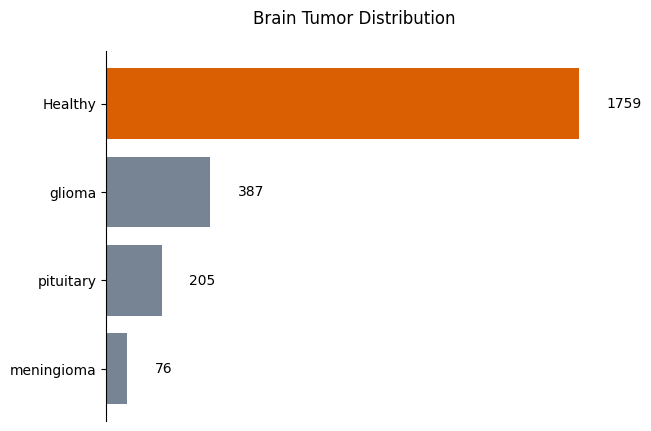

In [ ]:
colors=['#768493','#768493','#768493','#d95f02']

x =['meningioma','pituitary','glioma','Healthy']
y = [meningioma,pituitary,glioma,normal]
y.sort()

fig, ax = plt.subplots()

bars = ax.barh(x,y, color=colors)

ax.set_title('Brain Tumor Distribution', pad=20)
ax.set_xlabel('Number of Images')

# Styling
ax.spines[['right','top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)

ax.bar_label(bars, padding=20)

plt.show()